In [ ]:
!jupyter nbconvert --to html /content/Insurance_Cross_Selling_Prediction.ipynb

[NbConvertApp] Converting notebook /content/Insurance_Cross_Selling_Prediction.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 14 image(s).
[NbConvertApp] Writing 1197877 bytes to /content/Insurance_Cross_Selling_Prediction.html


**Introduction**

Cross-selling is a common selling practice in which additional products or services are offered to current customers. In this assignment, we will use Machine Learning techniques to predict whether an existing customer of an insurance company, who has a valid health insurance policy would be interested to buy a vehicle insurance from the same company.

**Problem Statement**

There are often lot of traditional insurance policies come with rider or act as an umbrella package to cover all the insurance needs like Home, Auto, Life for a customer. But manually analyzing the parameters or establishing the correlation between the customer preferences, behaviour and fine tune the insurance plans and pricing is not possible as there will be n number of factors that could impact the response of customer if part of it he is interested at.

Hence, in this case, building a model that could predict whether a customer would be interested in purchasing a vehicle insurance is extremely helpful for the company to accordingly plan its communication strategy on advertising out to those customers and optimise its business model and revenue. A model trained on a historic data, in turn, can also predict any new leads and increase the sales with the help of marketing.

**Loading the dataset -**
Source - Kaggle - https://www.kaggle.com/code/ramakrishnanthiyagu/vehicle-insurance-classification/input

In [ ]:
#Loading the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sd
import sklearn.compose
import sklearn.preprocessing
import sklearn.pipeline
import time
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# Loading the dataset
dfh = pd.read_csv("/content/sample_data/VehicleData.csv")


Overview of columns -
id;
Gender;
Age;
Driving_License - 0 : Customer does not have DL, 1 : Customer already has DL;
Region_Code;
Previously_Insured - 1 : Customer already has Vehicle Insurance with other companies, 0 : Customer doesn’t have Vehicle Insurance;
Vehicle_Age;
Vehicle_Damage - 1 : Customer has a vehicle damage in the past. 0 : Customer doesnt have one in the past history;
Annual_Premium - Policy amount the customer needs to pay as premium in the year for the current insurance;
PolicySalesChannel - Channel code to speak to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.;
Vintage - Number of Days, Customer has been associated with the company;
Response - 1 : Customer is interested, 0 : Customer is not interested

**Explanatory Data Analysis**

In [ ]:
dfh.info()
dfh.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [ ]:
#checking statistical distribution of numeric types
dfh.describe().style.background_gradient(cmap = 'copper')

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.124085
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.329679
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


75% of customers are upto age of 49 and only 25% are upto 25 years old.
Although maximum premium is about 540k annually, avg premium runs about 30k

In [ ]:
#checking distribution of categorical variables
dfh.describe(include= 'object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [ ]:
#Checking for null values and found no null values and duplicate entries
dfh.isna().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
dfh.duplicated().sum()

np.int64(0)

In [ ]:
dfh.isna().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


**Data Preprocessing**

The dataset is divided into three different sample sets as 1. training 2. Validation and 3. Test and the respective target variable ("Response") datasets

All the preprocessing steps will be applied on all the three sets like Missing values,Detect outliers and handle them


In [ ]:
# Splitting the dataset into 3 different sets - 80% train, 10% validation, 10% test
dfh_train, dfh_test = sd.model_selection.train_test_split(dfh, test_size=0.2, random_state=42)
dfh_val, dfh_test = sd.model_selection.train_test_split(dfh_test, test_size=0.5, random_state=42)

print("df size",dfh.shape)
print("df_train size",dfh_train.shape)
print("df_test size",dfh_test.shape)
print("df_val size",dfh_val.shape)

y_train = dfh_train["Response"]

y_val = dfh_val["Response"]
y_test = dfh_test["Response"]

print("Target_train size",y_train.shape)
print("Target_test size",y_test.shape)
print("Target_val size",y_val.shape)

df size (381109, 12)
df_train size (304887, 12)
df_test size (38111, 12)
df_val size (38111, 12)
Target_train size (304887,)
Target_test size (38111,)
Target_val size (38111,)


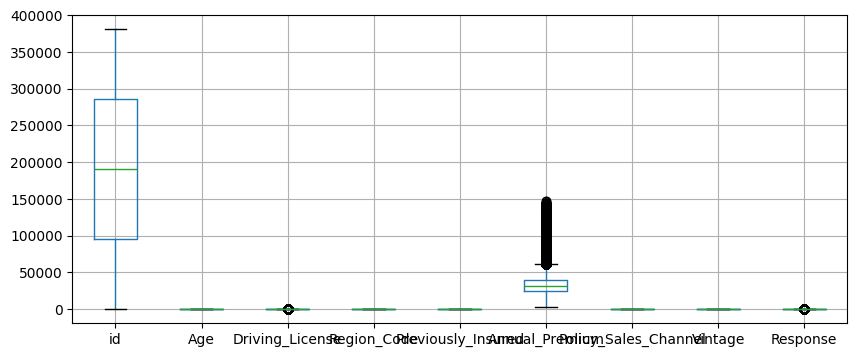

In [ ]:
# Checking for outliers -
dfh_numerical =dfh_train.select_dtypes(include=['int64','float64'])
dfh_categorical =dfh_train.select_dtypes(include=['object'])

fig = plt.figure(figsize=(10, 4))
Numerical_dfh = pd.DataFrame((dfh_numerical))
Numerical_dfh.boxplot()
plt.show()

From above we can see 'Annual Premium' column has some outliers. Let's check the percentage of those outliers wrt total dataset and if less than 3% we can remove them

In [ ]:
# The number of outliers is less than 3% of total samples, hence remove those records
(dfh_train['Annual_Premium'] > 150000).sum()

np.int64(152)

In [ ]:
# lets filter the dataset from having more than 150000 annual premium
dfh_train = dfh_train[dfh_train['Annual_Premium'] < 150000]
print("X_train size",dfh_train.shape)
y_train = dfh_train['Response']
print("Target_train size",y_train.shape)
dfh_val = dfh_val[dfh_val['Annual_Premium'] < 150000]
y_val = dfh_val['Response']
dfh_test = dfh_test[dfh_test['Annual_Premium'] < 150000]
y_test = dfh_test['Response']

X_train size (304735, 12)
Target_train size (304735,)


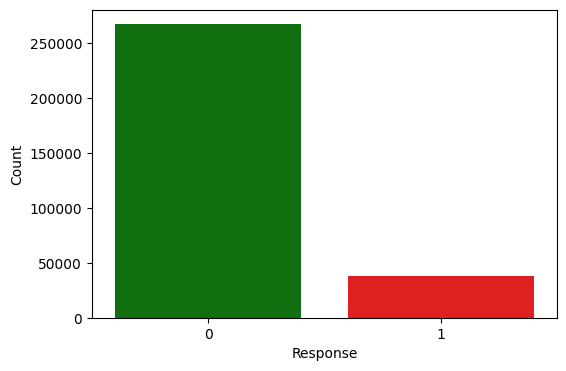

In [ ]:
#analyzing target variable

# number of customers per each response category
plt.figure(figsize=(6, 4))
s = sns.countplot(data=dfh_train,x='Response',hue='Response',palette=['g', 'r'],legend=False)
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

Target coulmn class is imbalanced or biased because Not interested customers as Response 0 are higher than interested customers Response 1. Hence, we should be using ensemble methods to train the model as it can handle the imbalanced datasets automatically to an extent but also need to evaluate the scores


**Impact of Numerical columns on target response**

<Axes: xlabel='Policy_Sales_Channel', ylabel='Count'>

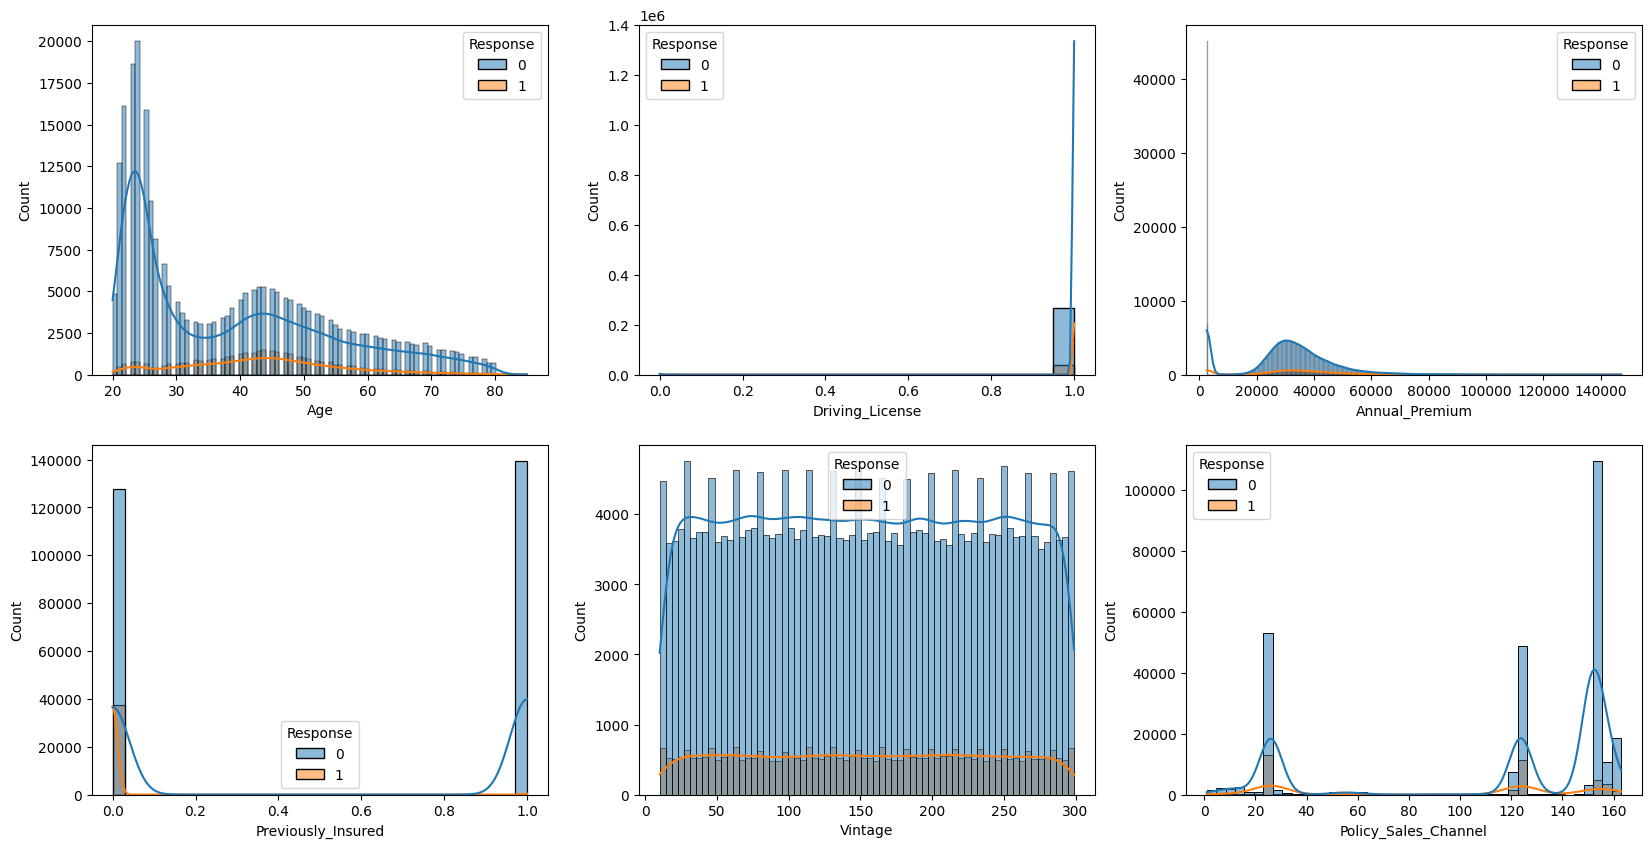

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(data=dfh_train, x='Age', kde=True, hue='Response',  ax=axs[0,0])
sns.histplot(data=dfh_train, x='Driving_License', kde=True, hue='Response',  ax=axs[0,1])
sns.histplot(data=dfh_train, x='Annual_Premium', kde=True, hue='Response',  ax=axs[0,2])
sns.histplot(data=dfh_train, x='Previously_Insured', kde=True, hue='Response',  ax=axs[1,0])
sns.histplot(data=dfh_train, x='Vintage', kde=True, hue='Response',  ax=axs[1,1])
sns.histplot(data=dfh_train, x='Policy_Sales_Channel', kde=True, hue='Response', ax=axs[1,2])

The ratio of customers wanted to buy is lesser in policy channel 26 and 126, almost null at policy channel 156.
Customers at age 40 to 50 are showing more interest on insurance policy wherein between 20 and 30 age lower and after 60 are almost 0.

From above, we see that Annual Premium and driving License have not much influence on target response.

customers who have no prior vehicle insurance are willing to buy

Vintage graph says even customers associated with the company for a very long time, havent shown much interest in buying the vehicle insurance from them :-(

**Impact of Categorical variables on target response**

<Axes: xlabel='Previously_Insured', ylabel='Count'>

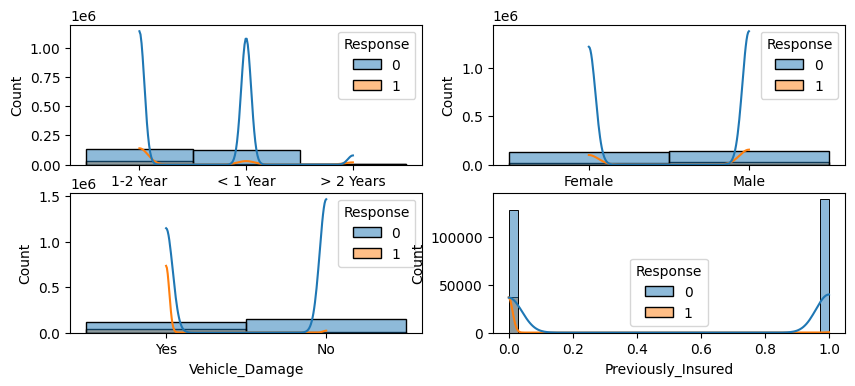

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 4))
sns.histplot(data=dfh_train, x='Vehicle_Age', kde=True, hue='Response', ax=axs[0,0])
sns.histplot(data=dfh_train, x='Gender', kde=True, hue='Response', ax=axs[0,1])
sns.histplot(data=dfh_train, x='Vehicle_Damage', kde=True, hue='Response', ax=axs[1,0])
sns.histplot(data=dfh_train, x='Previously_Insured', kde=True, hue='Response',  ax=axs[1,1])


Male customers are slightly more insterested than females.Although existing cutomers have less % of vehicle damage, they are the ones that are interested to purchase the vehicle policy.

If the vehicle age is between 1-2 years, they are willing to purchase than other 2 categories.
Customers with no past vehicle damage - Not at all interested at buying one.


**Feature Engineering**

Irrelevant features removal, encoding and standardizing the dataset

Removing if columns and Diving license as they have no signficance

In [ ]:
dfh_train.drop(['Response', 'id','Driving_License'], axis=1, inplace=True)
x_train = dfh_train
dfh_val.drop(['Response', 'id','Driving_License'], axis=1, inplace=True)
x_val = dfh_val
dfh_test.drop(['Response', 'id','Driving_License'], axis=1, inplace=True)
x_test = dfh_test

In [ ]:
dfh_train.head(2)

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
332803,Female,39,15,0,1-2 Year,Yes,52906,55,227
116248,Male,38,11,0,1-2 Year,Yes,23038,26,29


In [ ]:
numerical_attributes = ['Age','Annual_Premium','Vintage','Policy_Sales_Channel']
categorical_attributes = ['Previously_Insured','Vehicle_Damage','Vehicle_Age','Gender',]

ct_train = sd.compose.ColumnTransformer(transformers=[('encoding', OneHotEncoder(), categorical_attributes),('scaling', StandardScaler(), numerical_attributes)])
ct_val = sd.compose.ColumnTransformer(transformers=[('encoding', OneHotEncoder(), categorical_attributes),('scaling', StandardScaler(), numerical_attributes)])
ct_test = sd.compose.ColumnTransformer(transformers=[('encoding', OneHotEncoder(), categorical_attributes),('scaling', StandardScaler(), numerical_attributes)])

x_train_encoded = ct_train.fit_transform(x_train)
x_val_encoded = ct_val.fit_transform(x_val)
x_test_encoded = ct_test.fit_transform(x_test)
print(x_train_encoded.shape)
print(x_test_encoded.shape)
print(x_val_encoded.shape)

(304735, 13)
(38096, 13)
(38087, 13)


In [ ]:
x_train_encoded_df = pd.DataFrame(x_train_encoded)
x_train_encoded_df.head(2)
x_val_encoded_df = pd.DataFrame(x_val_encoded)
x_test_encoded_df = pd.DataFrame(x_test_encoded)

print(x_train_encoded_df.shape)
print(x_test_encoded_df.shape)
print(x_val_encoded_df.shape)

(304735, 13)
(38096, 13)
(38087, 13)


In [ ]:
x_train_encoded_df.head(2)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.010731,1.369176,0.869545,-1.050612
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.053749,-0.452833,-1.497721,-1.585387


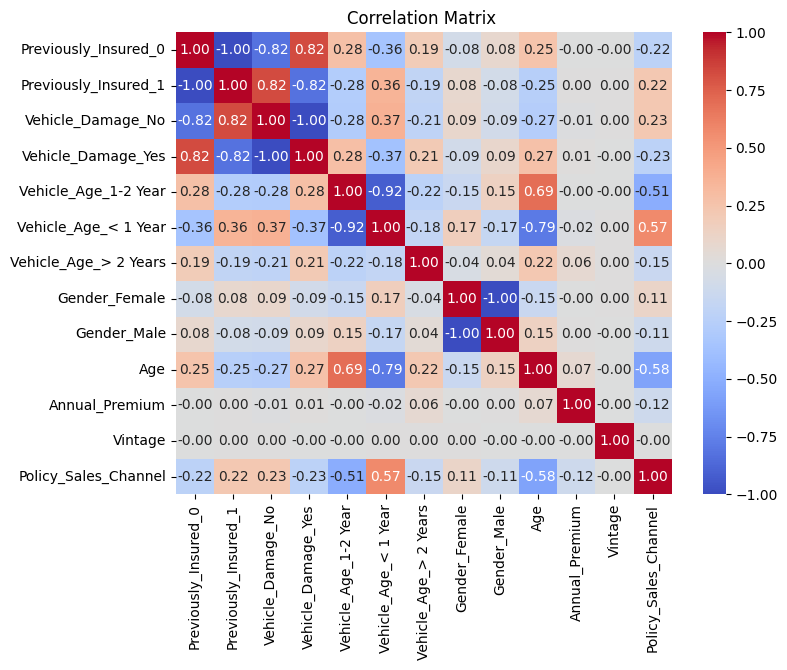

In [ ]:
# Correlation Matrix
cat_features = ct_train.named_transformers_['encoding'].get_feature_names_out(categorical_attributes)
num_features = numerical_attributes
feature_names = np.concatenate((cat_features, num_features))
x_train_encoded_df.columns = feature_names

corr = x_train_encoded_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix ')
plt.show()

Highest correlation 0.82 exists between  (Previously insured and Vehicle_Damage)
 0.79 (Vehicle Age<1 year and Age)
 0.69 (Vehicle Age<1-2 year and Age)
 0.57 (Policy_Sales_Channel and Vehicle_Age and 0.58 with Age
This shows all the above variables will have an impact on response field - which will be confirmed in model evaluation results

In [ ]:
y_train.value_counts()

,count
Response,
0,267108
1,37627


Above target output ratio says that “Not interested” class is more than 'interested' response class.Hence, it is recommended to use any ensemble methods to train such imbalanced classes. But precision, recall and F-score will be evaluated separately for each class seperately.

**Model Training**

**Model 1 -  RandomForest Classifier**

In [ ]:
# RandomForestClassifier without hyperparameter tuning

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [300],
    'criterion': ['gini'],
    'max_depth': [9],
    'min_samples_split': [6],
    'min_samples_leaf': [15],
    'random_state': [42]
}

#5-fold cross-validation is used, n_jobs - Use all core CPUs
grid_rf = GridSearchCV(rf, param_grid, cv=5,scoring='f1_macro',verbose=0, n_jobs=-1,return_train_score=True)
start = time.time()
grid_rf.fit(x_train_encoded, y_train)
end = time.time() - start
print(f"Took {end} seconds")
print (grid_rf.best_params_)
best_model_rf = grid_rf.best_estimator_

Took 414.94523000717163 seconds
{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 15, 'min_samples_split': 6, 'n_estimators': 300, 'random_state': 42}


In [ ]:
print("Accuracy", grid_rf.score(x_val_encoded,y_val))

Accuracy 0.4659927372656787


In [ ]:
# Hypertuning of RandomClassifier model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [200,300],
    'criterion': ['gini'],
    'max_depth': [9,12],
    'min_samples_split': [6,10],
    'min_samples_leaf': [15],
    'random_state': [42]
}

#5-fold cross-validation is used, n_jobs - Use all core CPUs
grid_rf = GridSearchCV(rf, param_grid, cv=5,scoring='f1_macro',verbose=0, n_jobs=-1,return_train_score=True)
start = time.time()
grid_rf.fit(x_train_encoded, y_train)
end = time.time() - start
print(f"Took {end} seconds")
print (grid_rf.best_params_)
best_model_rf = grid_rf.best_estimator_
print("Accuracy", grid_rf.score(x_val_encoded,y_val))

Took 2339.924597263336 seconds
{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 15, 'min_samples_split': 6, 'n_estimators': 300, 'random_state': 42}
Accuracy 0.4664027763800793


f1_val:  0.0008238928939237899
[[33234     3]
 [ 4848     2]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     33237
           1       0.40      0.00      0.00      4850

    accuracy                           0.87     38087
   macro avg       0.64      0.50      0.47     38087
weighted avg       0.81      0.87      0.81     38087



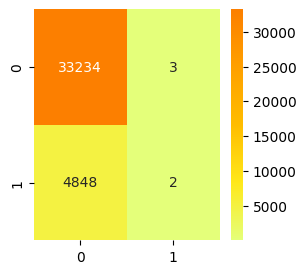

In [ ]:
y_pred = best_model_rf.predict(x_val_encoded)
print("f1_val: ", f1_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(confusion_matrix(y_val, y_pred), annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

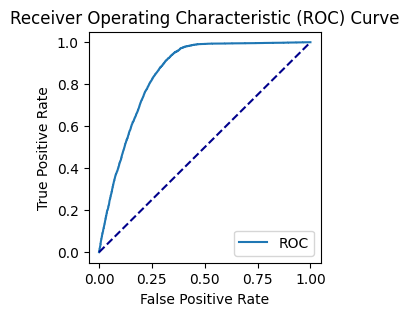

AUC: 0.85


(array([0.00000000e+00, 3.00869513e-05, 3.00869513e-05, ...,
        9.99368174e-01, 9.99428348e-01, 1.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 2.06185567e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]))

In [ ]:
#predict_proba gives the probabilities for the target (0 and 1 in our case)
#AUC ROC Curve based on the probability of the accurate prediction, FPRs and TPRs
y_probs = grid_rf.predict_proba(x_val_encoded)
fpr, tpr, thresholds1=metrics.roc_curve(y_val,  y_probs[:,1])
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
auc = metrics.roc_auc_score(y_val, y_probs[:,1])
print('AUC: %.2f' % auc)
fpr,tpr

**Model 2 - HistGradientBoosting Classifier**

In [ ]:
# HistGradientBoostingClassifier With Hypertuning
# For imbalanced classes, add parameter class_weight='balanced'

from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

model_hgb = HistGradientBoostingClassifier(max_leaf_nodes=5, random_state=42,class_weight='balanced',early_stopping=False)
param_grids = {
     'learning_rate': [0.001,0.01, 0.1],
      "max_iter": [2,3,5],
      'max_depth': [2,3,5],
}
cv = KFold(n_splits=4, shuffle=True, random_state=42)
results = []
grid_search_hgb = GridSearchCV(estimator=model_hgb,param_grid=param_grids,return_train_score=True, cv=cv)
start = time.time()
grid_search_hgb.fit(x_train_encoded, y_train)
end = time.time() - start
print(f"Took {end} seconds")
result = {"model":  "Hist Gradient Boosting", "cv_results": pd.DataFrame(grid_search_hgb.cv_results_)}
result
print("Accuracy", grid_search_hgb.score(x_val_encoded,y_val))
print (grid_search_hgb.best_params_)
best_model_hgb = grid_search_hgb.best_estimator_

Took 53.85444259643555 seconds
Accuracy 0.7154409641084885
{'learning_rate': 0.001, 'max_depth': 3, 'max_iter': 2}


f1_val:  0.4428336417849064
[[22942 10295]
 [  543  4307]]
              precision    recall  f1-score   support

           0       0.98      0.69      0.81     33237
           1       0.29      0.89      0.44      4850

    accuracy                           0.72     38087
   macro avg       0.64      0.79      0.63     38087
weighted avg       0.89      0.72      0.76     38087



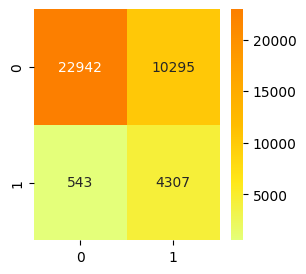

In [ ]:
y_pred_hgb = best_model_hgb.predict(x_val_encoded)
print("f1_val: ", f1_score(y_val, y_pred_hgb))
print(confusion_matrix(y_val, y_pred_hgb))
print(classification_report(y_val, y_pred_hgb))
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(confusion_matrix(y_val, y_pred_hgb), annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

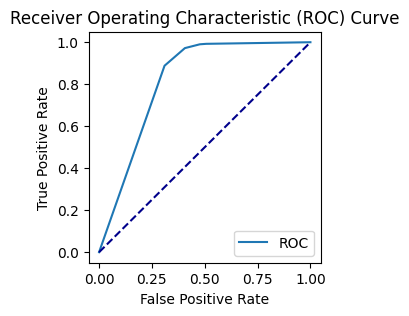

AUC: 0.82


(array([0.        , 0.30974516, 0.40605349, 0.47666757, 0.50693504,
        1.        ]),
 array([0.        , 0.88804124, 0.97195876, 0.99010309, 0.99237113,
        1.        ]))

In [ ]:
y_probs = grid_search_hgb.predict_proba(x_val_encoded)
fpr, tpr, thresholds1=metrics.roc_curve(y_val,  y_probs[:,1])
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
auc = metrics.roc_auc_score(y_val, y_probs[:,1])
print('AUC: %.2f' % auc)
fpr,tpr

**Model 3 -  XGBoost Classifier**

In [ ]:
# XGBoost Classifier with hypertuning
#Imbalanced classes add parameters pos_class_weight and max_delta_step

from xgboost import XGBClassifier
#put in the parameters
param_grids = {
      'n_estimators': [5,10,30],
      'max_depth' : [1,2,3],
}
pos_class_weight = (len(y_train) - np.sum(y_train)) / np.sum(y_train)
xgb = XGBClassifier(scale_pos_weight=pos_class_weight, max_delta_step=1,)
grid_xgb = GridSearchCV(xgb,param_grid=param_grids, cv=5,verbose=0, n_jobs=-1,return_train_score=True)
start = time.time()
grid_xgb.fit(x_train_encoded, y_train)
end = time.time() - start
print(f"Took {end} seconds")
print (grid_xgb.best_params_)
best_model_xgb = grid_xgb.best_estimator_

y_pred_xgb = best_model_xgb.predict(x_val_encoded)

print("Training Accuracy :", best_model_xgb.score(x_train_encoded, y_train))
print("Testing Accuracy :", best_model_xgb.score(x_val_encoded, y_val))

Took 33.97373127937317 seconds
{'max_depth': 3, 'n_estimators': 30}
Training Accuracy : 0.6938782876925854
Testing Accuracy : 0.6995562790453436


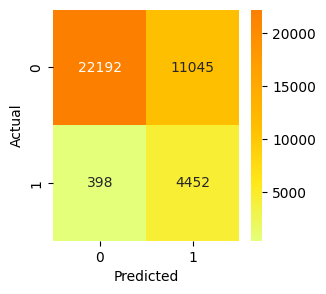

              precision    recall  f1-score   support

           0       0.98      0.67      0.80     33237
           1       0.29      0.92      0.44      4850

    accuracy                           0.70     38087
   macro avg       0.63      0.79      0.62     38087
weighted avg       0.89      0.70      0.75     38087



In [ ]:
cm = confusion_matrix(y_val, y_pred_xgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# classification report for performance analysis
cr = classification_report(y_val, y_pred_xgb)
print(cr)

Adjusting the max_depth improves the False Negative getting low (High Recall Score for Response class 1) but increasing more FP could also make the model worst. Hence, in order to strike the balance, assuming the best estimators are max_depth=3 at n_estimators=30

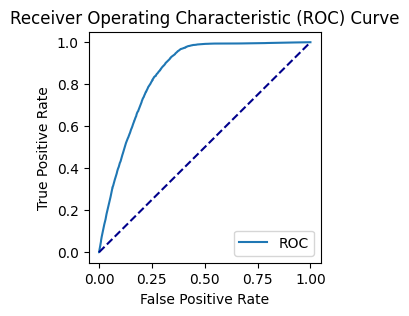

AUC: 0.85


(array([0.00000000e+00, 3.00869513e-05, 9.02608539e-05, ...,
        9.99819478e-01, 9.99879652e-01, 1.00000000e+00]),
 array([0., 0., 0., ..., 1., 1., 1.]))

In [ ]:
y_probs = grid_xgb.predict_proba(x_val_encoded)
fpr, tpr, thresholds1=metrics.roc_curve(y_val,  y_probs[:,1])
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
auc = metrics.roc_auc_score(y_val, y_probs[:,1])
print('AUC: %.2f' % auc)
fpr,tpr

**Model 4 - Logistic Regression**

Although, ensemble learning method is recommended, checking with logistic classification to confirm the accuracy is better or not

In [ ]:
# Logistic Regression with hyperparameters 'C' tuned

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
classifier = LogisticRegression()
# setting the hyper_parameter c

parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,10], "max_iter":[2000] }

grid_lgr = GridSearchCV(classifier,parameters)
start = time.time()
grid_lgr.fit(x_train_encoded, y_train)
end = time.time() - start
print(f"Took {end} seconds")
print (grid_lgr.best_params_)
best_model_lgr = grid_lgr.best_estimator_
y_pred_lgr = best_model_lgr.predict(x_val_encoded)
print("Training Accuracy :", best_model_lgr.score(x_train_encoded, y_train))
print("Testing Accuracy :", best_model_lgr.score(x_val_encoded, y_val))

Took 35.043551206588745 seconds
{'C': 0.0001, 'max_iter': 2000}
Training Accuracy : 0.876525505767306
Testing Accuracy : 0.8726599627169376


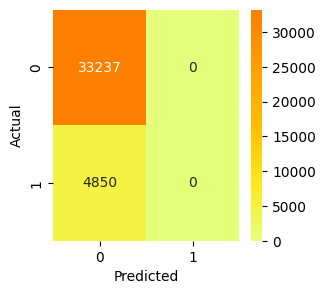

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     33237
           1       0.00      0.00      0.00      4850

    accuracy                           0.87     38087
   macro avg       0.44      0.50      0.47     38087
weighted avg       0.76      0.87      0.81     38087



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
cm = confusion_matrix(y_val, y_pred_lgr)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# classification report for performance analysis
cr = classification_report(y_val, y_pred_lgr)
print(cr)

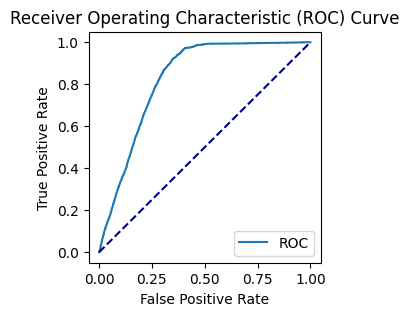

AUC: 0.83


(array([0.00000000e+00, 3.00869513e-05, 3.00869513e-05, ...,
        9.97593044e-01, 9.97593044e-01, 1.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 4.12371134e-04, ...,
        9.99793814e-01, 1.00000000e+00, 1.00000000e+00]))

In [ ]:
y_probs = grid_lgr.predict_proba(x_val_encoded)
fpr, tpr, thresholds1=metrics.roc_curve(y_val,  y_probs[:,1])
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
auc = metrics.roc_auc_score(y_val, y_probs[:,1])
print('AUC: %.2f' % auc)
fpr,tpr

**Model Evaluation**

Being an imbalanced class with less positive responses, we will be evaluating the Recall scores rather than precision accuracy.

1. In general, insurance companies are OK to promote products to little bit of customers who are not interested (False positives) too. However, they definitely do not want to miss the potential customers (Meaning, we cannot compromise on False negatives for Response class 1). We would like to see less false -ves or almost zero. So the Recall score is given more importance than Precision and high recall score for response 1 is expected, nearly 1.0

2. We also want to check the weighted average Recall score to be confident enough to say it has considered enough number of support classes

3. ROC - AUC - It can play a role if the accuracy ROC is significantly different for the various model results

4. Computational time and cost

ROC - AUC is relatively between 82-85% in all the models. Hence, considering the above three other factors to evaluate all the 4 models -

1. Randomforest hypertuning took very long time about 2911 secs to find out the best estimators, accuracy is very low about 46% and relatively worst performance/speed. Recall score for Response 1 class is Zero, absolutely null. Model Not recommended

2. HistGradient boosting Classifier - Better accuracy 71% and **Recall for** **Response 1 class is 0.89 (Very good)** ignoring low recall for response class 0. Also, the weighted avg recall is 0.72 (Good), Computing is faster - Model Recommended

3. XGBoost Classifier - Almost same result as HGB Classifier - Better accuracy - 70% and and **Recall for Response 1 class is 0.92 (Very good)** ignoring low recall for response class 0.Also, the weighted avg recall is 0.88 (Good), an advantage od Precision for response 1 class is slightly more as 0.30 compared to 0.29 of XGB and Computing speed is slightly faster than HistGradientBoosting Classifier makes it as a **Best Model Recommended**

4. Logistic Regression - Better accuracy - 87% and high F1 score for response class 0. But we are interested at Recall for Response class 1 - which is Zero although weighted avg recall is 0.88, average computing speed - Model Not Recommended


To conclude, although XGBoost Classifier didnt give us absolute 1.0 Recall score for Response class 1, considering 0.92 as Very Good and computing speed is definitely faster at 22 secs, it is the best model recommended to train our dataset.Hence we will be training the concatenated training and validation datasets with XGBoost Classifier best estimator params and predict the results for the test set.

In [ ]:
# Concatenate the validation dataset to train set and train the best model
x_train_val_encoded = np.concatenate((x_train_encoded, x_val_encoded), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

In [ ]:
#  Train XGBoost Classifier with the identified best parameters in the above section

param_grids = {
      'n_estimators': [30],
      'max_depth' : [3],
}
pos_class_weight = (len(y_train) - np.sum(y_train)) / np.sum(y_train)
xgb = XGBClassifier(scale_pos_weight=pos_class_weight, max_delta_step=1,)
grid_xgb = GridSearchCV(xgb,param_grid=param_grids, cv=5,verbose=0, n_jobs=-1,return_train_score=True)
start = time.time()
grid_xgb.fit(x_train_val_encoded, y_train_val)
end = time.time() - start
print(f"Took {end} seconds")
# Test the model against the final test set
y_pred_hgb = grid_xgb.predict(x_test_encoded)
print("Testing Accuracy :", grid_xgb.score(x_test_encoded, y_test))

Took 8.259373426437378 seconds
Testing Accuracy : 0.6907286854262915


**Model Explainability**

1. Which features have an impact on the target variable and how much? This will help the marketing team to focus on those customer segments

In [ ]:
# put them into a separate variable for extraction of feature names
feature_importances = grid_xgb.best_estimator_.feature_importances_
cat_features = ct_train.named_transformers_['encoding'].get_feature_names_out(categorical_attributes)
num_features = numerical_attributes
feature_names = np.concatenate((cat_features, num_features))
feature_scores = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)
feature_scores

,0
Vehicle_Damage_No,0.493950
Previously_Insured_0,0.415922
Vehicle_Age_< 1 Year,0.034682
Age,0.025238
Vehicle_Age_1-2 Year,0.012024
Policy_Sales_Channel,0.007067
Vehicle_Age_> 2 Years,0.004399
Gender_Female,0.003565
Annual_Premium,0.002097
Vintage,0.001056


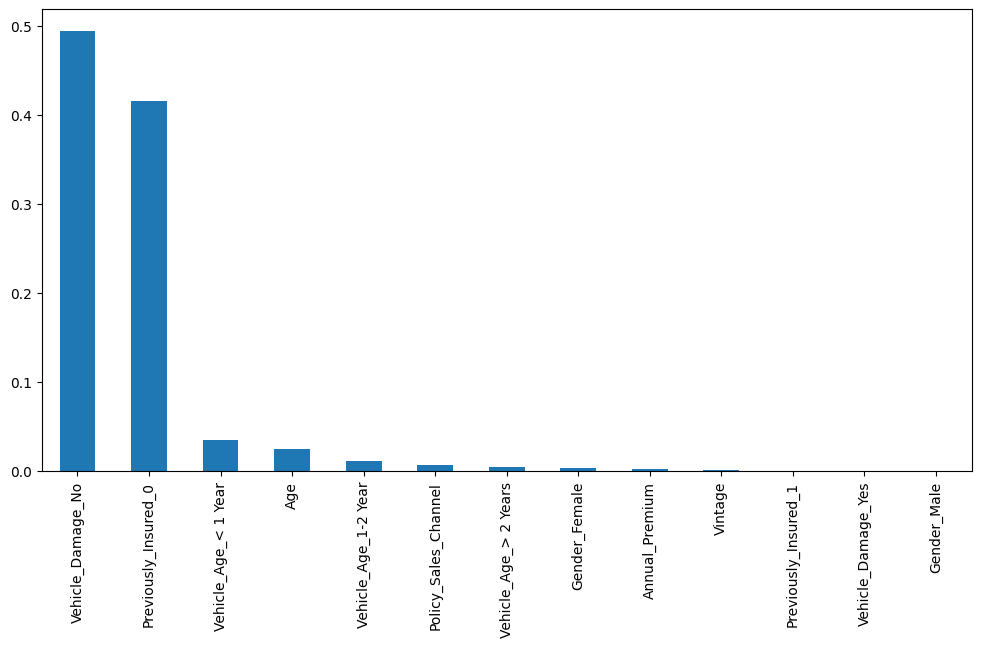

In [ ]:
_ = feature_scores.plot(kind='bar',figsize=(12, 6))


Feature importance and data exploration charts reveal that -

Vehicle_Damage_No,Not Previously Insured, Age are the factors influencing the target variable/response predominantly.

1) No past vehicle damage factor constitutes the highest influence of 49% on the target variable.
2) Previous_Insurance_No has around 42% influence on buying the vehicle insurance decision. From the data charts, it is found that around 42.8% of their customers who dont have vehicle insurance previously have responded yes to buy one
3) Vehicle Age < 1 year has around 3% importance on target response class

These findings could provide actionable insights for refining marketing strategies, boosting customer acquisition, and increasing revenue.

**Conclusion**

1. Challenges and limitations - Handling Large dataset.
Already available methods of hyper-parameter tuning were taking a huge amount of time to process.
Memory Optimization during hyperparameter tuning.
The difference in computation times among the training algorithms suggests variations in their computational complexity, efficiency and cost



**References**

N.B, H. (2020). Confusion Matrix, Accuracy, Precision, Recall, F1 Score. [online] Medium. Available at: https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd.

‌Czakon, J. (2019). F1 Score vs ROC AUC vs Accuracy vs PR AUC: Which Evaluation Metric Should You Choose? [online] neptune.ai. Available at: https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc.

‌prashant111 (2019). Random Forest Classifier + Feature Importance. [online] Kaggle.com. Available at: https://www.kaggle.com/code/prashant111/random-forest-classifier-feature-importance#9.-Feature-Engineering-- [Accessed 24 Mar. 2025].

Xgboosting.com. (2024). XGBoost for Imbalanced Classification | XGBoosting. [online] Available at: https://xgboosting.com/xgboost-for-imbalanced-classification/ [Accessed 25 Mar. 2025].

‌‌https://github.com/GhodratRezaei/vehicle-Insurance-Classification-/blob/main/Classification.ipynb

raheem nasirudeen (2022). Vehicle Insurance Prediction Part-2 - raheem nasirudeen - Medium. [online] Medium. Available at: https://nasere4567.medium.com/vehicle-insurance-prediction-part-2-580e136c6383 [Accessed 24 Mar. 2025].

Khulekani Mavundla, Thakur, S., Adetiba, E. and Abdultaofeek Abayomi (2024). Predicting Cross-Selling Health Insurance Products Using Machine-Learning Techniques. Journal of Computer Information Systems, pp.1–18. doi:https://doi.org/10.1080/08874417.2024.2395913.‌

raviatkumar (2023). GitHub - raviatkumar/Health-Insurance-Cross-Sell-Prediction: An Insurance company that has provided Health Insurance to its customers wants to building a model to predict whether the customers will also be interested in Vehicle Insurance provided by the company. [online] GitHub. Available at: https://github.com/raviatkumar/Health-Insurance-Cross-Sell-Prediction [Accessed 24 Mar. 2025].

‌
https://github.com/ankit986/HEALTH-INSURANCE-CROSS-SELL-PREDICTION?tab=readme-ov-file#metrics-evaluation

